<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

순환 신경망은 순차데이터에 잘맞는 인공신경망이다. 이전 토큰에대한 출력을 현재 토큰에 대한 계산을 할때 포함 시킨다.
뒤로 순환신경망이 또 이어질때는 모든토크에대한 결과를 출력한다.

In [16]:
#data준비
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 300) #사전을 300단어로 함
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [17]:
#검증세트 분리
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)
print(train_input.shape, val_input.shape)
print(train_target.shape, val_target.shape)

(20000,) (5000,)
(20000,) (5000,)


In [18]:
#길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100) #길이를 100으로 맞춤
val_seq = pad_sequences(val_input, maxlen = 100)

In [19]:
#단어 임베딩을 이용해서 순환 신경망 만들기
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100)) #임베딩층
model.add(keras.layers.SimpleRNN(8)) #8개 셀
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4) #optimizer생성(learning rate조정을 위함)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

#모델 훈련

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 31s 92ms/step - loss: 0.7004 - accuracy: 0.4940 - val_loss: 0.6996 - val_accuracy: 0.4964
Epoch 2/100
  2/313 [..............................] - ETA: 22s - loss: 0.7083 - accuracy: 0.4609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 26s 84ms/step - loss: 0.6942 - accuracy: 0.5132 - val_loss: 0.6959 - val_accuracy: 0.5060
Epoch 3/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6902 - accuracy: 0.5299 - val_loss: 0.6936 - val_accuracy: 0.5188
Epoch 4/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6867 - accuracy: 0.5472 - val_loss: 0.6921 - val_accuracy: 0.5250
Epoch 5/100
313/313 [==============================] - 27s 87ms/step - loss: 0.6836 - accuracy: 0.5563 - val_loss: 0.6910 - val_accuracy: 0.5322
Epoch 6/100
313/313 [==============================] - 26s 85ms/step - loss: 0.6806 - accuracy: 0.5683 - val_loss: 0.6903 - val_accuracy: 0.5296
Epoch 7/100
313/313 [==============================] - 26s 85ms/step - loss: 0.6777 - accuracy: 0.5767 - val_loss: 0.6898 - val_accuracy: 0.5320
Epoch 8/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6747 - accuracy: 0.5836 - val_loss: 0.6893 - val_accuracy: 0.53

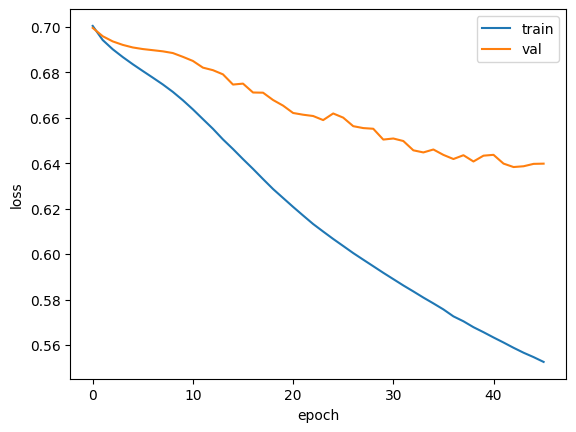

In [21]:
#그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()